<h1><center>Laboratorio 3: El Pandas no muerde 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Catherine Benavides
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: Los Galácticos

- Nombre de alumno 1: Arturo Marín
- Nombre de alumno 2: Martín Gonzalez


### **Link de repositorio de GitHub:** https://github.com/ArturoMarin9/Laboratorios-MDS7202-1

### Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 7 días desde la publicación, 3 días de atraso con 1 punto de descuento c/u.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos Y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquer material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas` para manejar datos tabulares.
- Aprender a utilizar la documentación de pandas (y en general, de cualquier librería de python) como también a buscar soluciones en la web.

> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

### Librerias utiles para el Lab 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from IPython.display import display

#Libreria para plotear
!pip install --upgrade plotly
import plotly.express as px

# Librerias utiles
from sklearn.preprocessing import StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 31.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


# 1. Rendimiento en Estudiantes 📚

Para este laboratorio deberán trabajar con el dataset `students_grades.json` el cual contiene información sobre el rendimiento de alumnos en distintos ramos.
El objetivo principal será el de realizar un trabajo de limpieza de prepración y exploración de datos utilizando exclusivamente `DataFrames` y sus métodos asociados.




In [3]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = "/content/drive/My Drive/Otoño 2024/Lab MDS/Laboratorios/Lab 3/"
except:
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


## 1. Carga e Inspección de Datos [1.0 Puntos]


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1hZZaPQlZe4VupFOXt76_wjuUA5NpUhrw" width="300" height="300">
</p>

*Don Caguayo*, rector de la Universidad de la Cachaña, les comenta que actualmente la Universidad no tiene una subdirección de análisis de datos, pero que tiene un gran interés en formar una. Es por esto, que se contacta con ud. y su equipo para iniciar de forma exploratoria diversas tareas de análisis y consolidación de datos respectivos al rendimiento de sus alumnos.

Previo a su primera reunión con el rector, el rector le envía una copia de la base de datos, la cuál a usted y su equipo le encantaría examinar. Para esto, la primera tarea que debe realizar es abrir y cargar el dataset.


> **Notar que es sumamente importante el formato que posee cada columna** para su manipulación y que posiblemente ustedes deberán especificar algunos tipos de datos a mano. Ver la documentación del método `read_json` para mayor información.

A continuación se muestra un ejemplo de los dos primeros registros del dataset:

```json
[
  {
    "names": "Rita Courtney",
    "gender": "female",
    "race/ethnicity": "group B",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 37,
    "reading score": 46,
    "writing score": 46
  },
  {
    "names": "Madeline Fuller",
    "gender": "female",
    "race/ethnicity": "group C",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 124,
    "reading score": 142,
    "writing score": 142
  }
]
```





In [5]:
df_grades = pd.read_json(path +"students_grades.json")
df_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   names                        1400 non-null   object
 1   gender                       1400 non-null   object
 2   race/ethnicity               1400 non-null   object
 3   parental level of education  1400 non-null   object
 4   lunch                        1400 non-null   object
 5   test preparation course      1400 non-null   object
 6   math score                   1400 non-null   object
 7   reading score                1400 non-null   object
 8   writing score                1400 non-null   object
dtypes: object(9)
memory usage: 98.6+ KB


Con lo anterior, es posible observar que las columnas 'math score', 'reading score' y 'writing score' son de tipo objecto y no númericas, por lo tanto es necesario cambiar el tipo de variable de estas columnas para poder trabajar con ellas, y que las aplicaciones que se hagan a estas variables, tengan sentido!

In [6]:
# Conviertir columnas a tipo numérico
df_grades['math score'] = pd.to_numeric(df_grades['math score'], errors='coerce')
df_grades['reading score'] = pd.to_numeric(df_grades['reading score'], errors='coerce')
df_grades['writing score'] = pd.to_numeric(df_grades['writing score'], errors='coerce')

# Verificar el tipo de datos después de la conversión
print(df_grades.dtypes)

names                           object
gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object


In [7]:
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Madeline Fuller,female,group C,some high school,standard,none,124.0,142.0,142.0
2,Daniel Rester,male,group E,associate's degree,standard,none,156.0,196.0,193.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
4,Geraldine Hale,female,group A,associate's degree,standard,none,131.0,166.0,166.0
...,...,...,...,...,...,...,...,...,...
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193.0,196.0,193.0



<p align="center">
  <img src="https://i.giphy.com/media/4FQMuOKR6zQRO/giphy.webp">
</p>


Posteriormente, el rector les comenta que la sección de TI posee una base de datos con más de **875** filas, en donde cada fila representa un alumno matriculado. Sin embargo, cree fuertemente que existen errores en esta: solo tiene registro de **875** matriculas. Por este motivo, especula que se han realizado malas prácticas al registrar dichos datos.

En consecuencia, el rector les solicita a ustedes como tarea inicial que exploren la base de datos y encuentre posibles falencias dentro de sus registros. Para esto, usted debe estar al tanto que las notas están en una escala que van del **0 al 100** (porcentaje de logro) y **no es posible que un alumno haya dado más de una vez el mismo examen**. Cualquier alumno que posea un valor diferente a esta escala, debería ser eliminado de la base de datos.


> **Instrucciones**

**Cree una función** que tome un `DataFrame` y que le permita revisar si las diferentes variables que lo componen son coherentes y si es posible observar anomalías en estas.

**To-Do**
1. [ ] Imprimir un mensaje con las dimensiones del Dataframe.
2. [ ] Imprimir un mensaje con los nombres de las columnas que conforman el DataFrame.
3. [ ] Mostrar los primeros 5, los últimos 5 elementos del DataFrame y realice un muestreo de 5 elementos de forma aleatoria.
4. [ ] Mostrar una descripción rápida de las variables numéricas del DataFrame (utilice un método visto en clases).
5. [ ] Imprimir un mensaje con la cantidad de valores nulos (investigue el método `isna()` y `sum()` de los DataFrames).
6. [ ] Imprimir un mensaje que detalle la cantidad de valores unicos (investigue `nunique()`) .
7. [ ] Imprimir un mensaje con el total de filas que contengan nombres duplicados (investigue `duplicated()` y su parámetro `subset`).
8. [ ] Mostrar las filas que contengan nombres sean duplicados (investigue `duplicated()` y su parámetro `subset`).

Finalmente, responda las siguientes preguntas (comente esto en la celda ubicada debajo de **justificación**.):

9. [ ] ¿Qué anomalías es posible observar de los datos que componen el DataFrame? ¿Existen valores nulos o duplicados?


10. [ ] Su compañero ChatGPT le provee un código para que pueda entender los resultados de las pruebas desde un gráfico. ¿Qué puede interpretar de la distribución de las notas en el boxplot?

> **Nota:** Para imprmir utilice `print(...)`. Para mostrar `DataFrames`, utilice `display(...)` ya que este permite mostrar estos elementos como tablas.

> **Nota 2:** Utilice la documentación de [pandas](https://pandas.pydata.org/docs/index.html) como también StackOverflow para resolver cualquier problema o inconveniente.

> **Nota 3:** Si no ha trabajado con boxplot antes, el siguiente link puede serle de mucha ayuda: [boxplot](https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c)

**Respuesta:**

In [8]:
def exploratory_data_analysis(dataframe):
    # 1. Dimensiones del DataFrame
    print(f"1. El DataFrame tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas")
    print()

    # 2. Nombres de las columnas
    print("2. Las columnas dl DaraFrame son:")
    print(dataframe.columns.tolist())
    print()

    # 3. Primeros 5, últimos 5 y muestra aleatoria de 5 elementos
    print("3.1. Primeros 5 elementos:")
    display(dataframe.head())
    print("3.2. Últimos 5 elementos:")
    display(dataframe.tail())
    print("3.3. Muestra aleatoria de 5 elementos:")
    display(dataframe.sample(5, random_state=42))
    print()

    # 4. Descripción rápida de las variables numéricas
    print("4. Descripción rápida de las variables numéricas:")
    display(dataframe.describe())
    print()

    # 5. Cantidad de valores nulos
    print("5. Cantidad de valores nulos:")
    print(dataframe.isna().sum())
    print()

    # 6. Cantidad de valores únicos
    print("6. Cantidad de valores únicos:")
    print(dataframe.nunique())
    print()

    # 7. Total de filas con nombres duplicados
    print('7.- EL Dataframe presenta un total de ', dataframe.duplicated(subset= ['names']).sum() ,' filas con nombres duplicados.\n')
    print()

    # 8. Filas que contienen nombres duplicados
    print("8. Las filas duplicadas son:")
    display(dataframe[dataframe.duplicated(subset=["names"])].sort_values(by=["names"]))
    print()

    print('9. Boxplot de notas:')
    display(dataframe[['math score', 'reading score', 'writing score']].plot.box())



In [9]:
# Código del amigo ChatGPT (listo para usar)
fig = px.box(
    df_grades.melt(
        value_vars=["math score", "reading score", "writing score"],
        var_name="subject",
        value_name="score",
    ),
    y="score",
    color="subject",
)
fig.show()

**Justificación:**

```
Existen algunas anomalías que se pueden obvservar al analizar los datos, una de ellas es que para las variables de math, reading y writing score, no se respeta el límite de puntaje, que corresponde a 100, pues existen valores mayores a 100 para esas variables.

También se obvserva que hay 1153 nombres distintos en el dataframe, lo que no se condice con la información que se maneja sobre la cantidad de matriculas, en este sentido ese número debería coincidir con la cantidad de nombres distintos, es decir, debería ser 875. En este sentido, hay 247 nombres repetidos en el datframe.

Además existen valores nulos para las variables de math, reading y writing score.

En relación a lo observado a partir de los bloxplots, se tiene que la prueba de matemáticas presenta una mayor varianza comparando con las demás, pues tiene oitliers tanto de valores bajs como altos, las otras dos pruebas solo tienen valores anomales altos. También, al comparar las medianas, se tiene que son bastante similares entre las 3 pruebas.
```

**Respuesta Esperada:**

1. El DataFrame tiene 1400 filas y 9 columnas

2. Las columnas dl DaraFrame son:
['names', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

3.1. Primeros 5 elementos:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Madeline Fuller,female,group C,some high school,standard,none,124.0,142.0,142.0
2,Daniel Rester,male,group E,associate's degree,standard,none,156.0,196.0,193.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
4,Geraldine Hale,female,group A,associate's degree,standard,none,131.0,166.0,166.0


3.2. Últimos 5 elementos:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193.0,196.0,193.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0


3.3. Muestra aleatoria de 5 elementos:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
665,Bonnie Williams,female,group A,some high school,standard,completed,193.0,196.0,97.0
624,Marcia York,female,group D,bachelor's degree,free/reduced,none,63.0,73.0,78.0
115,Francisco Johnson,male,group B,associate's degree,standard,completed,82.0,84.0,78.0
478,Edward Lowman,male,group E,associate's degree,free/reduced,completed,91.0,73.0,80.0
233,Thomas Simmons,male,group C,bachelor's degree,standard,completed,131.0,171.0,196.0



4. Descripción rápida de las variables numéricas:


,math score,reading score,writing score
count,1360.000000,1360.000000,1353.000000
mean,89.538971,93.086029,91.852919
std,47.152422,46.385775,47.043570
min,0.000000,17.000000,10.000000
25%,59.000000,63.000000,62.000000
50%,72.000000,76.000000,75.000000
75%,97.250000,100.000000,100.000000
max,196.000000,196.000000,196.000000



5. Cantidad de valores nulos:
names                           0
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     40
reading score                  40
writing score                  47
dtype: int64

6. Cantidad de valores únicos:
names                          1153
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       96
reading score                    88
writing score                    92
dtype: int64

7.- EL Dataframe presenta un total de  247  filas con nombres duplicados.


8. Las filas duplicadas son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
441,Aaron Oakden,male,group D,high school,free/reduced,none,NaN,193.0,124.0
1393,Adam Romero,male,group C,high school,standard,completed,124.0,193.0,49.0
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0
1049,Amanda Barker,female,group C,some college,free/reduced,completed,64.0,85.0,85.0
1174,Amy Hawes,female,group B,bachelor's degree,standard,none,142.0,147.0,193.0
...,...,...,...,...,...,...,...,...,...
768,William Gardiner,male,group E,high school,free/reduced,none,55.0,56.0,51.0
1121,William Ng,male,group C,some high school,standard,none,62.0,64.0,55.0
1023,William Saska,male,group B,associate's degree,standard,none,193.0,42.0,142.0
476,Willie Neff,female,group E,associate's degree,free/reduced,none,NaN,193.0,142.0



9. Boxplot de notas:


<Axes: >

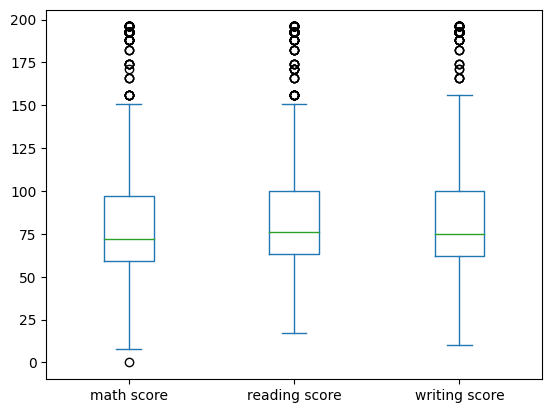

In [10]:
exploratory_data_analysis(df_grades)

## 2 Limpieza de Datos [1.0 puntos]




<p align="center">
  <img src="https://blogdatlas.files.wordpress.com/2020/07/datlas_mx_blog_limpieza_bds_data-scrubbing-service.gif">
</p>

En base a lo realizado anteriormente, realice una limpieza de los dataset. Asuma los supuestos señalados en la pregunta anterior para limpiar el `DataFrame` y cree una función que le permita limpiar los datos. Habiendo limpiado el `DataFrame`, compruebe nuevamente los datos con la función creada en la sección 1.1.

**To-Do:**

- [ ] Crear función que permita limpiar el dataset.
- [ ] Comprobar que no existen anomalías en los datos a traves de la función de la sección 1.1.

**Hint**

Puede ser útil los métodos ```.drop_duplicates()``` y ```.dropna()``` como también utilizar queries con máscaras booleanas.


**Respuesta Esperada:**

In [11]:
def clean_data(df):
    # Copiamos el DataFrame para no modificar el original
    clean_df = df.copy(deep=True)

    # Eliminamos filas con valores nulos
    df = df.dropna()

    # Eliminamos filas con notas mayores a 100
    df = df[(df['math score'] <= 100) & (df['reading score'] <= 100) & (df['writing score'] <= 100)]

    # Eliminamos filas duplicadas en la columna "names"
    df = df.drop_duplicates(subset=['names'])

    return df

In [12]:
df_grades = clean_data(df_grades)
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0
...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0


> Utilice la función creada en el punto 1.1 para verificar sus resultados.

1. El DataFrame tiene 1000 filas y 9 columnas

2. Las columnas dl DaraFrame son:
['names', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

3.1. Primeros 5 elementos:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0


3.2. Últimos 5 elementos:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0


3.3. Muestra aleatoria de 5 elementos:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
750,Stephen Broenneke,male,group B,some college,standard,none,54.0,52.0,51.0
1039,Donald Greenberg,male,group C,associate's degree,standard,none,46.0,43.0,42.0
1044,Karen Wagaman,female,group B,associate's degree,standard,none,80.0,86.0,83.0
938,Brenna Pate,female,group A,bachelor's degree,standard,none,51.0,49.0,51.0
586,Larry Torres,male,group D,associate's degree,free/reduced,none,53.0,54.0,48.0



4. Descripción rápida de las variables numéricas:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



5. Cantidad de valores nulos:
names                          0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

6. Cantidad de valores únicos:
names                          1000
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       81
reading score                    72
writing score                    77
dtype: int64

7.- EL Dataframe presenta un total de  0  filas con nombres duplicados.


8. Las filas duplicadas son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score



9. Boxplot de notas:


<Axes: >

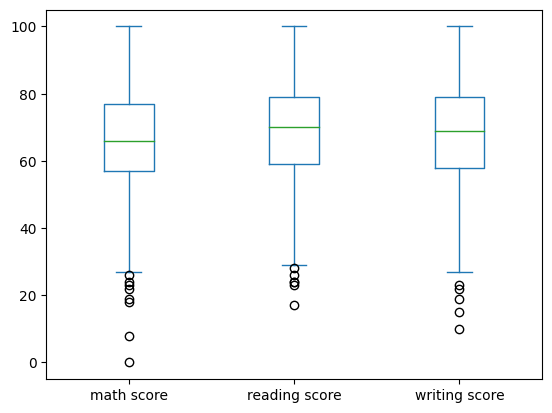

In [13]:
# Escriba su código aquí
exploratory_data_analysis(df_grades)

**Justificación:**

```
Notamos que se ha logrado limpiar el dataframe con éxito, pues analizandolo mediante la función que hemos creado (exploratory_data_analysis), se observa que no hay valores nulos ni filas repetidas.

Por otro lado, ahora es posible observar con mayor claridad y fidelidad la distribución y dispersión de los datos. De los boxplot generados por la misma función se observa que el rango intercuatilico de los puntajes para las 3 pruebas ronda aproximadamente el intervalo 60%-80%.
```

## 3. Trabajando con Datos [2.0 puntos]

<p align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif">
</p>

### 3.1 Transformación de notas a "Nota Chilena" [0.3 Puntos]

En una de las reuniones con Don Caguayo este les comenta su intención de pasar todas sus notas a la "Escala Chilena". Para esto les facilita la siguiente ecuación:

$$Nota \, Chilena= \% \, de \, logro*0.06 + 1$$

Utilizando la ecuación entregada, cree una función que le permita pasar a la escala Chilena las notas del dataframe y entregue las notas redondeadas al segundo decimal.

**To-Do**

- [ ] Tranforme los valores a la escala chilena.

**Respuesta:**

In [14]:
def nota_chilena(dataframe_in, columna):

  # Copiamos el DataFrame para no modificar el original
  df_out = dataframe_in.copy(deep=True)

  # Aplicamos formula dada por enunciado, redondeamos a dos decimales y aseguramos que sea float
  df_out[columna] = (df_out[columna] * 0.06 + 1)

  return df_out

In [15]:
df_grades = nota_chilena(df_grades,'math score')
df_grades = nota_chilena(df_grades,'reading score')
df_grades = nota_chilena(df_grades,'writing score')

df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22
...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26
1394,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86
1397,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72


**Respuesta esperada:**

In [16]:
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22
...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26
1394,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86
1397,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72


### 3.2 Obtención de promedio de alumnos [0.3 Puntos]

Con todas las notas adjuntadas, la prestigiosa Universidad De la Cachaña necesita obtener el promedio general de cada uno de los alumnos. Para esto se le solicita que calcule el promedio con cada una de las asignaturas y el promedio se anexe como una nueva columna al final del `DataFrame` original. Cabe señalar que las notas deben ser redondeadas al segundo decimal.

**To-Do:**
- [ ] Crear función que nos permite obtener el promedio de cada uno de los alumnos y anexar esta información en el `DataFrame` original.


**Respuesta:**

In [17]:
def alumnos_promedio(dataframe_in):
  # Copiamos el DataFrame para no modificar el original
  df_out = dataframe_in.copy(deep=True)
  df_out['GPA'] = ((df_out['math score'] + df_out['writing score'] + df_out['reading score'])/3)
  df_out['GPA'] = df_out['GPA'].round(2).astype(float)
  return df_out


In [18]:
df_grades = alumnos_promedio(df_grades)
df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


**Respuesta Esperada:**

In [19]:
df_grades = alumnos_promedio(df_grades)
df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


### 3.3 Reprobados y Destacados [0.9 Puntos, 0.3 cada DataFrame]

Contentos con su desempeño, la Universidad les solicita que obtengan los alumnos quienes han reprobado el año y los que han tenido desempeño de destacado. Para esto se considerará que un alumno ha reprobado el año cuando el promedio de notas es inferior a 4.0 en la Escala Chilena, y se considerará destacado si posee notas superiores a 5.8 en todas las asignaturas (o sea notas superiores a 5.8 en `math score`, `reading score` y `writing score`).

Cree una función que permita obtener tres Dataframes:
- El primero deberá poseer solamente los alumnos que han reprobado en la prestigiosa universidad.
- El segundo debe entregar un DataFrame similar al original, pero marcado con una "R" el promedio de notas de los alumnos reprobados.
- El tercero será un Data Frame con los alumnos destacados ordenados de mayor a menor.

**To-Do:**

- [ ] Obtener DataFrame con los alumnos que reprobaron el año.
- [ ] Obtener DataFrame similar al original, pero marcados con una "R" el atributo GPA de los alumnos reprobados.
- [ ] Obtener DataFrame con los alumnos destacados ordenados de mayor a menor.

**Respuesta:**

In [20]:
def reprobados_destacados(dataframe_in):

    # Copiamos el DataFrame para no modificar el original
    df_reprobados = dataframe_in.copy(deep=True)  # Copia para reprobados
    df_reprobados_con_R = dataframe_in.copy(deep=True)  # Copia para reprobados con marca R
    df_destacados = dataframe_in.copy(deep=True)  # Copia para destacados ordenados

    df_reprobados = df_reprobados[df_reprobados['GPA'] < 4]

    df_reprobados_con_R['GPA'] = np.where(df_reprobados_con_R['GPA'] < 4, 'R', df_reprobados_con_R['GPA'])

    df_destacados = df_destacados.query('`math score` >= 5.8 and `writing score` >= 5.8 and `reading score` >= 5.8')
    df_destacados = df_destacados.sort_values(by='GPA', ascending=False)

    return df_reprobados, df_reprobados_con_R, df_destacados



In [21]:
dataframe1, dataframe2, dataframe3 = reprobados_destacados(df_grades)
dataframe1

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
13,Mikki Amaya,female,group A,high school,free/reduced,completed,3.04,3.88,3.46,3.46
26,Samuel Dougal,male,group C,master's degree,free/reduced,completed,3.76,3.52,3.76,3.68
55,Rodger Talavera,male,group B,high school,free/reduced,none,3.16,2.74,2.62,2.84
63,Morris Johnson,male,group A,associate's degree,free/reduced,completed,3.40,4.30,4.18,3.96
...,...,...,...,...,...,...,...,...,...,...
1371,Charles Harian,male,group C,some high school,free/reduced,completed,3.70,4.12,3.94,3.92
1373,Wendy Gunnell,female,group D,some high school,free/reduced,none,2.62,3.04,2.92,2.86
1389,Diana Costa,female,group C,high school,free/reduced,none,3.46,3.76,3.58,3.60
1391,Amy Sieving,female,group C,high school,standard,none,2.74,2.74,2.80,2.76


In [22]:
dataframe2

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,R
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34
...,...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.3
1394,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,R
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42
1397,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54


In [23]:
dataframe3

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
677,Richard Pryor,male,group E,bachelor's degree,standard,completed,7.00,7.00,7.00,7.00
1352,Sandra Pompey,female,group E,associate's degree,standard,none,7.00,7.00,7.00,7.00
384,Elizabeth Beasley,female,group E,bachelor's degree,standard,none,7.00,7.00,7.00,7.00
475,Emma Gray,female,group E,bachelor's degree,standard,completed,6.94,7.00,7.00,6.98
1276,Angela Cressey,female,group D,some college,standard,none,6.88,7.00,6.94,6.94
...,...,...,...,...,...,...,...,...,...,...
145,Katrina Wilcox,female,group E,bachelor's degree,standard,none,5.80,5.98,5.98,5.92
96,Harry Berry,male,group B,associate's degree,standard,completed,5.86,5.92,5.92,5.90
1335,Paul Brownell,male,group B,high school,standard,none,5.92,5.92,5.80,5.88
1338,James Daniel,male,group C,associate's degree,standard,none,6.04,5.80,5.80,5.88


**Respuesta:**

```
Escriba aqui su respuesta
```

### 3.4 Quintiles de Rendimiento [0.5 Puntos]

El rector, intrigado por saber si existe una relación entre el nivel educacional de los padres y las notas de sus hijos les plantea estudiar dicha relación. Para esto, les solicita que desde el `DataFrame` que posee a todos los alumnos (`DataFrame` obtenido tras la limpieza), generen una nueva columna que clasifique en quintiles de rendimiento para sus alumnos: `['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto']`. (investigar `qcut()`)

Hecho esto, grafique a través de un scatter plot el nivel educacional de los padres v/s el promedio de los alumnos, utilice los cuantiles generados anteriormente para mostrar en que cuantil se encuentra cada uno de los datos.

Realizado el grafico, responda la siguiente pregunta: **¿Es posible visualizar alguna tendencia en el gráfico?.**



**Respuesta:**

In [24]:
# Código para quintiles

# Calculamos el promedio de las notas de los estudiantes
df_grades['promedio'] = df_grades[['math score', 'reading score', 'writing score']].mean(axis=1)

# Creamos los quintiles y los asignamos a una nueva columna llamada 'GPA cuantiles'
df_grades["GPA cuantiles"] = pd.qcut(df_grades["promedio"], q=5, labels=["Bajísimo", "Bajo", "Medio", "Alto", "Muy alto"])


"""
NOTA: La variable del dataframe que contenga los quintiles debe llamarse
'GPA cuantiles' para que el gráfico funcione.
"""

"\nNOTA: La variable del dataframe que contenga los quintiles debe llamarse\n'GPA cuantiles' para que el gráfico funcione.\n"

In [25]:
# Código de gráfico del amigo ChatGPT
fig = px.scatter(
    df_grades.sort_values(by="GPA"),
    x="GPA",
    y="parental level of education",
    hover_data=["gender"],
    color="GPA cuantiles",
    title="GPA por Nivel de educación de los padres",
    color_discrete_sequence=["tomato", "orange", "yellow", "greenyellow", "green"]
)

fig


```
Observando el gráfico anterior, se observa una tendencia al aumento del número de alumnos en los 2 quintiles más bajos de GPA a medida que disminuye el nivel educacional de los padres.

También se observa que, a medida que disminuye el nivel educacional de los padres, el valor mínimo para el GPA también lo hace.
```

## 4. Operaciones con tablas [2.0 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExYWx5dTBkMGhhOTJmeGQzbDV5M21rNTN1NWVwMm1qbHd3cjh3Nmk4NSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/13HBDT4QSTpveU/giphy.gif">
</p>



### 4.1 Carga de datos y concatenar dataset [0.2 Puntos]

Ya finalizado en análisis inicial, ud. y su equipo le entregaron a *Don Caguayo* (rector de la Universidad de la Cachaña) tanto los resultados del análisis como también la base de datos limpia y lista para ser almacenada. Dada la ingente cantidad de los datos, el equipo de TI de la universidad resolvió separar el dataset en dos bases de datos distintas (lo que según argumentan ellos, permitiría hacer agregaciones de forma más eficiente).

Gracias a la excelente labor de ud. y su equipo en el análisis previo, el rector le solicita continuar el trabajo con una nueva batería de análisis. Por este motivo, la sección de TI les entrega nuevamente los datos. Sin embargo, argumentan que dada una escazes de personal, solo le entregarán *dumps* (copias) de cada base de datos y su equipo deberá unir las bases de datos. Los datos se encuentran en los siguiente archivos `.json`: `students_grades_1.json` y `students_grades_2.json`.


Por ende, ud. y su equipo deciden que la primera tarea se centrará en cargar estos datos y unirlos.

**No se preocupe por la limpieza ni transformar el tipo de datos de las columnas, ni tampoco transformar a notas chilenas**, recuerde que anteriormente ya se encargo de este tema.


Hint: investigue el método `concat`

In [51]:
# Inserte su respuesta aquí
import pandas as pd

# Leer los archivos JSON en marcos de datos de pandas
df1 = pd.read_json(path+"students_grades_1.json")
df2 = pd.read_json(path+"students_grades_2.json")

# Concatenar los marcos de datos
merged_df = pd.concat([df1, df2])

# Verificar el resultado
print(merged_df)


                names  gender race/ethnicity parental level of education  \
0       Rita Courtney  female        group B            some high school   
1    Charles Linstrom    male        group A           bachelor's degree   
2         Brian Young    male        group C            some high school   
3      Howard Jimenez    male        group E            some high school   
4        Wayne Wilson    male        group B            some high school   
..                ...     ...            ...                         ...   
470     Richard Young    male        group D                 high school   
471     Wanda Russell  female        group B                 high school   
472    Marina Zeigler  female        group C           bachelor's degree   
473     Laurie Carter  female        group B            some high school   
474      Amanda Perez  female        group A                 high school   

            lunch test preparation course  math score  reading score  \
0        standa

### 4.2 Análisis por Nivel Educacional Etnia de los Padres [0.8 Puntos]

El rector, basado en su experiencia, cree fuertemente que el nivel educacional y la etnia de los padres influyen en las notas que obtienen sus hijos.
Como científicos de datos, ud. y su equipo creen que deben encontrar evidencia para confirmar o refutar la hipótesis del rector.

Para esto, deciden generar dos análisis: una tabla de resumen por una parte y gráficos de caja por otro.


**Tabla de Resumen [0.5 Puntos] **


Para generar la tabla de resumen:

- [ ] Calcular el promedio de las notas y guardarlo en una variable `GPA` (grade point average).
- [ ] Hacer una simplificación a través de un mapeo (investigar el método `map()`) de la variable `parental level of education`  según la siguiente conversión:

        some high school -> school
        some college -> school
        high school -> school
        bachelor's degree -> college
        associate's degree -> college
        master's degree -> postgraduate

  Los resultados de este mapeo deben ser guardados en la columna `simple parental level of education`.


- [ ] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener el promedio de las notas.
- [ ] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener un conteo de los alumnos en cada grupo y agregarlos como una nueva fila count.
- [ ] Obtener el porcentaje de alumnos con respecto al total. Los porcentajes deben ser strings que contienen la frecuencia de cada grupo con respecto al total y deben ser terminados en '%'.

Utilizar la tabla de resultados esperados como guía para desarrollar este punto.


**Análisis [0.3 Puntos]**

Finalmente, responda las siguientes preguntas sobre el gráfico de caja que viene implementado a continuación. En este se muestra el GPA con respecto al nivel educacional, donde la variable de color es la etnicidad.

- [ ]  ¿Hay alguna diferencia entre los grupos graficados tanto para el nivel educacional de los padres como también para la etnicidad?


In [52]:
# Calcular el promedio de las notas y agregar la nueva columna "GPA"
merged_df['GPA'] = merged_df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Definir el mapeo de las categorías
education_map = {
    'some high school': 'school',
    'some college': 'school',
    'high school': 'school',
    "bachelor's degree": 'college',
    "associate's degree": 'college',
    "master's degree": 'postgraduate'
}

# Aplicar el mapeo a la columna 'parental level of education' y guardar los resultados en una nueva columna
merged_df['simple parental level of education'] = merged_df['parental level of education'].map(education_map)

# Agregar según 2 niveles y obtener el promedio de GPA
average_gpa = merged_df.groupby(['race/ethnicity', 'simple parental level of education'])['GPA'].mean().reset_index(name='average_GPA')

# Agregar según 2 niveles y obtener el conteo de alumnos
count_students = merged_df.groupby(['race/ethnicity', 'simple parental level of education']).size().reset_index(name='count')

# Calcular el porcentaje de alumnos con respecto al total
total_students = merged_df.shape[0]
count_students['percentage'] = (count_students['count'] / total_students * 100).astype(str) + '%'

# Agregar las columnas de puntuación al resultado
result = pd.merge(average_gpa, count_students, on=['race/ethnicity', 'simple parental level of education'])
result = pd.merge(result, merged_df.groupby(['race/ethnicity', 'simple parental level of education'])[['math score', 'reading score', 'writing score']].mean().reset_index(), on=['race/ethnicity', 'simple parental level of education'])

# Reordenar las columnas
result = result[['race/ethnicity', 'simple parental level of education', 'math score', 'reading score', 'writing score', 'average_GPA', 'count', 'percentage']]

# Imprimir el resultado
result


,race/ethnicity,simple parental level of education,math score,reading score,writing score,average_GPA,count,percentage
0,group A,college,4.735000,5.005000,4.890000,4.876667,24,2.742857142857143%
1,group A,postgraduate,4.690000,5.230000,5.350000,5.090000,2,0.2285714285714286%
2,group A,school,4.568235,4.725882,4.558824,4.617647,51,5.828571428571429%
3,group B,college,5.070000,5.264444,5.192222,5.175556,54,6.171428571428572%
4,group B,postgraduate,4.912000,5.692000,5.548000,5.384000,5,0.5714285714285714%
5,group B,school,4.689159,4.887664,4.764299,4.780374,107,12.22857142857143%
6,group C,college,5.021765,5.370588,5.354706,5.249020,102,11.657142857142858%
7,group C,postgraduate,4.924000,5.144000,5.104000,5.057333,15,1.7142857142857144%
8,group C,school,4.764516,5.023871,4.919355,4.902581,155,17.71428571428571%
9,group D,college,5.108286,5.248000,5.248857,5.201714,70,8.0%


In [53]:
fig = px.box(
    merged_df,
    x="simple parental level of education",
    y="GPA",
    color="race/ethnicity",
    hover_data=["GPA"],
)
fig.show()

Claro que hay diferencias. Pues notamos que a medida que aumenta el nivel educacional de los padres, hay menor cantidad de outliers para todos los grupos étnicos, o sea, la dispersión de las notas tiende a disminuir. Esto podría estar estar indicando que cuando los padres tienen un nivel educacional más alto, es más probable que sus hijos tengan un desempeño académico consistente y dentro de un rango predecible.

Por otro lado, se observa una tendencia generalizada a aumentar la mediana del promedio (GPA) al aumentar el nivel educacional de los padres. Pues cuando el nivel educacional de los padres es:
- "school": Hay 2 grupos étnicos con una mediana de GPA menor a 5
- "college": Hay solo 1 grupo étnico con una mediana de GPA menor a 5
- "postgraduate": No hay ningun grupo étnico con mediana de GPA menor a 5

También pareciera observarse que los grupos étnicos mantienen un "ranking" parecido para los distintos niveles de educación de los padres. Lo cual no puede explicarse solamente con la data recopilada (tendría que hacerse un análisis más profundo considerando otras variables externas).

**Resultado Esperado de la tabla**

|    | race/ethnicity   | simple parental level of education   |   math score |   reading score |   writing score |   GPA |   count | percentage   |
|---:|:-----------------|:-------------------------------------|-------------:|----------------:|----------------:|------:|--------:|:-------------|
|  0 | group A          | college                              |         4.74 |            5    |            4.89 |  4.88 |      24 | 2.74 %       |
|  1 |           | postgraduate                         |         4.69 |            5.23 |            5.35 |  5.09 |       2 | 0.23 %       |
|  2 |           | school                               |         4.57 |            4.73 |            4.56 |  4.62 |      51 | 5.83 %       |
|  3 | group B          | college                              |         5.07 |            5.26 |            5.19 |  5.18 |      54 | 6.17 %       |
|  4 |           | postgraduate                         |         4.91 |            5.69 |            5.55 |  5.38 |       5 | 0.57 %       |
|  5 |           | school                               |         4.69 |            4.89 |            4.76 |  4.78 |     107 | 12.23 %      |
|  6 | group C          | college                              |         5.02 |            5.37 |            5.35 |  5.25 |     102 | 11.66 %      |
|  7 |           | postgraduate                         |         4.92 |            5.14 |            5.1  |  5.06 |      15 | 1.71 %       |
|  8 |           | school                               |         4.76 |            5.02 |            4.92 |  4.9  |     155 | 17.71 %      |
|  9 | group D          | college                              |         5.11 |            5.25 |            5.25 |  5.2  |      70 | 8.0 %        |
| 10 |           | postgraduate                         |         5.22 |            5.54 |            5.73 |  5.5  |      20 | 2.29 %       |
| 11 |           | school                               |         5.02 |            5.13 |            5.11 |  5.09 |     149 | 17.03 %      |
| 12 | group E          | college                              |         5.54 |            5.45 |            5.45 |  5.48 |      52 | 5.94 %       |
| 13 |          | postgraduate                         |         5.54 |            6.03 |            5.89 |  5.82 |       6 | 0.69 %       |
| 14 |          | school                               |         5.4  |            5.31 |            5.16 |  5.29 |      63 | 7.2 %        |

### 4.3 Joins, joins y más joins [1 punto]

Mientras le notificaba por videollamada los resultados de sus descubrimientos a Don Caguayo, un exaltado practicante del area de TI entra a la reunión y les informa que ha encontrado una nueva base de datos que cuenta con las notas de dos asignaturas (en escala chilena): historia y ciencias.
Para más remate, antes de huir, el practicante les cuenta que este dataframe lamentablemente contiene nuevamente los alumnos de los registros corruptos que ud. y su equipo filtraron en el análisis anterior.


El rector (evidentemente molesto por la situación) les ruega incluir estos datos (vaciados en el archivo other_grades.csv) al estudio original(`students_grades.csv`).


Para esto, carge el archivo `other_grades.csv` y busque la forma de unir ambos DataFrames, de tal manera que las columnas de `history score` y `science score` se anexen al final del DataFrame original. **NO LIMPIE LOS DATOS**, si no que explore los distintos tipos de merge para encontrar el mas situable para su situación (y así evitar buscar duplicados).

**To-Do**


- [ ] Cargar el `other_grades.csv`
- [ ] Unir `df_grades` con `other_grades.csv` usando outer join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando left join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando right join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando inner join y explique el resultado.
- [ ] Defina cuál join es el que utilizará para generar el nuevo DataFrame.

> **Hint**: Puede explicar los resultados del merge a través de la cantidad de filas resultantes y los valores que estas contienen.

In [55]:
# Inserte su respuesta aquí
import pandas as pd

# Cargar el archivo other_grades.csv
other_grades_df = pd.read_csv(path+"other_grades.csv")

# Cargar el DataFrame original
df_grades = pd.read_json(path + "students_grades.json")

# Unir df_grades con other_grades.csv usando outer join
outer_join_df = pd.merge(df_grades, other_grades_df, how='outer', left_index=True, right_index=True)
print("Resultado de outer join:")
print(outer_join_df)
print("-----------------------------------")

# Unir df_grades con other_grades.csv usando left join
left_join_df = pd.merge(df_grades, other_grades_df, how='left', left_index=True, right_index=True)
print("Resultado de left join:")
print(left_join_df)
print("-----------------------------------")

# Unir df_grades con other_grades.csv usando right join
right_join_df = pd.merge(df_grades, other_grades_df, how='right', left_index=True, right_index=True)
print("Resultado de right join:")
print(right_join_df)
print("-----------------------------------")

# Unir df_grades con other_grades.csv usando inner join
inner_join_df = pd.merge(df_grades, other_grades_df, how='inner', left_index=True, right_index=True)
print("Resultado de inner join:")
print(inner_join_df)


Resultado de outer join:
               names_x  gender race/ethnicity parental level of education  \
0        Rita Courtney  female        group B            some high school   
1      Madeline Fuller  female        group C            some high school   
2        Daniel Rester    male        group E          associate's degree   
3     Charles Linstrom    male        group A           bachelor's degree   
4       Geraldine Hale  female        group A          associate's degree   
...                ...     ...            ...                         ...   
1395  Alexander Dillon    male        group D          associate's degree   
1396    Marina Zeigler  female        group C           bachelor's degree   
1397     Laurie Carter  female        group B            some high school   
1398      Joseph Mccoy    male        group D                some college   
1399      Amanda Perez  female        group A                 high school   

             lunch test preparation course math sc

Dadas las diferencias en las dimensionesn al realizar los distintos joins, lo más situable, dado el contexto del trabajo, sería realizar un "left join", así nos aseguramos de evitar pérdida de información y tenemos un dataframe completo y sucio, el cual habría que limpiar (mismo proceso que hicimos al comienzo del laboratorio).

pd. Esta lógica nace del hecho de que las dimensiones de la tabla final utilizando "left_join" y "outer_join" son iguales (y más altas que las otras 2), por lo cual podemos concluir que el DataFrame resultante de la unión contiene todas las filas del DataFrame original "df_grades", además de todas las filas del DataFrame "other_grades_df".

pd 2. Hacer un inner join o right join sería muy riesgoso, considerando lo que se indica en el enunciado -> "este dataframe lamentablemente contiene nuevamente los alumnos de los registros corruptos que ud. y su equipo filtraron en el análisis anterior". Si el nuevo dataframe estuviera limpio, entonces lo mejor sería hacer el right join.

# Conclusión


Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media1.tenor.com/images/2f7df460196625edc45b8380d158e5ee/tenor.gif?itemid=16669403">
</p>